In [1]:
import sqlalchemy
import pandas as pd
from sqlalchemy import text, select

In [2]:
from sqlalchemy import create_engine, Table, Column
from sqlalchemy import Integer, String, Text, MetaData

engine = create_engine('sqlite:///lyrics.db', echo=False)

meta = MetaData()

artists = Table('artists', meta,
                Column('artist', String, primary_key=True),
                Column('artist_url', String))

lyrics = Table('lyrics', meta,
               Column('artist', String),
               Column('song_title', String),
               Column('year', Integer),
               Column('song_url', String, primary_key=True),
               Column('lyrics', Text))

genres = Table('genre', meta,
               Column('id', Integer, primary_key=True, autoincrement=True),
               Column('song_url', String),
               Column('genre', String))

styles = Table('style', meta,
               Column('id', Integer, primary_key=True, autoincrement=True),
               Column('song_url', String),
               Column('style', String))

if __name__ == '__main__':
    meta.create_all(engine)


In [3]:
conn = engine.connect()

In [4]:
query = text('SELECT * FROM lyrics')
artists = conn.execute(query).fetchall()
data = pd.DataFrame(artists)
data.columns = ['artist', 'song', 'year', 'url', 'lyric']
data = data.drop(labels='url', axis=1)

In [5]:
data.head()

,artist,song,year,lyric
0,A B,Con el Tic Tac del Reloj,2000.0,Era tan facil soÃ±ar\r\nQue te podias quedar\r...
1,"A Band Called ""O""",Sleeping,1975.0,None
2,"A Band Called ""O""",Take Your Time,1975.0,None
3,A Band Called David,Another Try,1977.0,None
4,A Band Called David,Just the Same,1977.0,None


In [6]:
len(data)

1250843

In [7]:
len(data.artist.unique())

116773

In [8]:
data.song.value_counts().head(50)

NO LYRICS FOUND                                       15574
St. Louis Blues                                        1018
Body and Soul                                          1014
Stardust                                                990
Over the Rainbow                                        954
Intro                                                   951
Have Yourself a Merry Little Christmas                  901
Embraceable You                                         780
The Nearness of You                                     633
Skylark                                                 614
After You've Gone                                       606
O Little Town of Bethlehem                              602
My Foolish Heart                                        595
In a Sentimental Mood                                   593
Laura                                                   593
I'll Remember April                                     577
You Don't Know What Love Is             

In [9]:
stl_blues = data[data.song == 'St. Louis Blues']

In [10]:
stl_blues.sort_values('year')

,artist,song,year,lyric
694232,Louis Armstrong & His Orchestra,St. Louis Blues,1934.0,None
767002,Miff Mole,St. Louis Blues,1944.0,None
305119,Don Byas,St. Louis Blues,1949.0,None
992360,Sidney Bechet,St. Louis Blues,1950.0,None
18501,Albert Ammons,St. Louis Blues,1950.0,None
...,...,...,...,...
944790,Roscoe Holcomb,St. Louis Blues,NaN,None
973660,Scott Hamilton,St. Louis Blues,NaN,None
1047489,Syd Lawrence Orchestra,St. Louis Blues,NaN,None
1114872,The Metronome All-Stars,St. Louis Blues,NaN,None


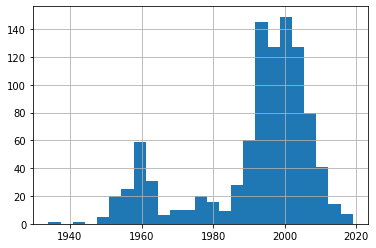

In [13]:
stl_blues.year.hist(bins=25)

In [14]:
data.artist.value_counts().head(50)

Elvis Presley         4010
Frank Sinatra         3399
Bing Crosby           2614
Ella Fitzgerald3      2465
Johnny Cash           2026
The Beach Boys        2001
Bob Dylan             1841
Louis Armstrong       1794
Nat King Cole         1589
Dean Martin           1430
Billie Holiday        1390
The Beatles           1329
Jerry Lee Lewis       1277
Judy Garland          1274
Johnny Hallyday       1251
Tony Bennett          1247
Edith Piaf            1181
George Jones          1175
Snoop Dogg            1147
David Bowie           1136
Grateful Dead         1130
Sarah Vaughan         1125
Lil Wayne             1053
Marvin Gaye           1040
Elton John            1032
B.B. King             1017
Ray Charles           1013
James Brown           1002
Diana Ross             997
Elvis Costello         995
Doris Day              994
Peggy Lee              958
Disney                 950
The Kinks              944
The Supremes           907
The Rolling Stones     902
Depeche Mode           897
R

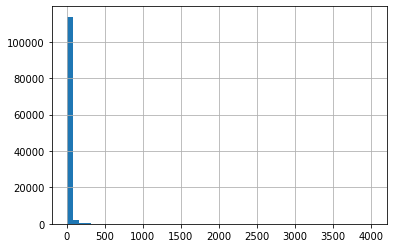

In [15]:
data.artist.value_counts().hist(bins=50)

In [16]:
elvis = data[data.artist == 'Elvis Presley']

In [17]:
elvis.head(15)

,artist,song,year,lyric
347612,Elvis Presley,Devoted to You [Stereo Debut],2019.0,None
347613,Elvis Presley,Stupid Cupid [Stereo Debut],2019.0,None
347614,Elvis Presley,Wake Up Little Susie [Stereo Debut],2019.0,"Wake up, little Susie, wake up\r\nWake up, lit..."
347615,Elvis Presley,Wear My Ring Around Your Neck [Stereo Debut],2019.0,None
347616,Elvis Presley,Jailhouse Rock [From Jailhouse Rock],1975.0,The warden threw a party in the county jail\nT...
347617,Elvis Presley,Surrender,1960.0,None
347618,Elvis Presley,Stranger in My Own Home Town,1969.0,None
347619,Elvis Presley,I Feel So Bad,1961.0,None
347620,Elvis Presley,Trouble/Guitar Man [Opening] [Live],2019.0,None
347621,Elvis Presley,Trouble/Guitar Man,1968.0,If you're looking for trouble\r\nYou came to t...


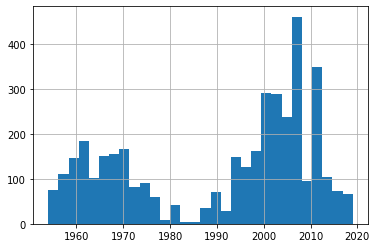

In [18]:
elvis.year.hist(bins=30)

In [ ]:
# Remove bracketed song information
# bracket_pattern = "([^\[]+)"
# elvis['stripped'] = elvis.song.str.extract(bracket_pattern)
# bracket_index = elvis.song.str.match(bracket_pattern)
# elvis.loc[bracket_index, 'song'] = elvis.loc[bracket_index, 'stripped']
# elvis['song'] = elvis.song.str.strip()
# elvis['song'] = elvis.song.str.lower()
# elvis.head(15)

In [19]:
def clean_data(df):
    df.song = df.song.str.replace(r'\[.*','')
    df.song = df.song.str.lower()
    df.song = df.song.str.replace(r',','')
    df.song = df.song.str.replace('\.+(\(.+\))', '')
    df.song = df.song.str.replace('(\(.+\))\.+', '')
    df.song = df.song.str.replace("'", '')
    df.song = df.song.str.replace("’", '')
    df.song = df.song.str.strip()
    return df

In [20]:
elvis_clean = clean_data(elvis)
elvis_clean.head()

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,artist,song,year,lyric
347612,Elvis Presley,devoted to you,2019.0,None
347613,Elvis Presley,stupid cupid,2019.0,None
347614,Elvis Presley,wake up little susie,2019.0,"Wake up, little Susie, wake up\r\nWake up, lit..."
347615,Elvis Presley,wear my ring around your neck,2019.0,None
347616,Elvis Presley,jailhouse rock,1975.0,The warden threw a party in the county jail\nT...


In [21]:
len(elvis.song.unique())

1317

In [22]:
test = elvis.groupby(['artist','song']).min()

In [23]:
test.head(50)

year
artist        song                                                
Elvis Presley                                               2006.0
              (dance with the) guitar man                   2015.0
              (im) all shook up                             1987.0
              (intro) johnny b. goode                       1975.0
              (its a) long lonely highway                   1964.0
              (let me be your) teddy bear                   1957.0
              (let me be your)teddy bear                    2012.0
              (lets have a) party                           2000.0
              (maries the name of) his latest flame         1964.0
              (maries the name) his latest flame            1960.0
              (now and then theres) a fool such as i        1959.0
              (such an) easy question                       1962.0
              (thats what you get) for lovin me             1978.0
              (there will be) peace in the valley (for me)  2012.0
              (therell be) peace in the valley              1957.0
              (therell be) peace in the valley (for me)     1960.0
              (theres) good rockin tonight                  2010.0
              (theres) no room to rhumba in a sports car    1963.0
              (therll be) peace in the valley               1971.0
              (youre so square) baby i dont care            1959.0
              (youre so square) baby i dont care            2016.0
              (youre the) devil in disguise                 1968.0
              8. ive lost you                               2016.0
              a big hunk o love                             1959.0
              a big hunk o love (loop)                      2007.0
              a big hunk olove                              2001.0
              a boy like me a girl like you                 1962.0
              a cane and a high starched collar             1969.0
              a dogs life                                   1966.0
              a fool such as i                              1978.0
              a fool such as i (now and then theres)        2008.0
              a fool such as i (now and then)               2000.0
              a house that has everything                   1967.0
              a hundred years from now                      1971.0
              a litte less conversation                     2002.0
              a little bit of green                         1969.0
              a little less conversation                    1970.0
              a little less conversation (junkie xl remix)  2010.0
              a little less conversations                   2001.0
              a little less coversation                     2006.0
              a mess of blues                               1960.0
              a thing called love                           1972.0
              a whistling tune                              1962.0
              a world of our own                            1963.0
              adam and evil                                 1966.0
              after loving you                              1969.0
              aint that lovin you baby                      2014.0
              aint that loving you baby                     1968.0
              all i needed was the rain                     1969.0
              all shook up                                  1957.0

In [24]:
data_clean = clean_data(data)
data.head()

,artist,song,year,lyric
0,A B,con el tic tac del reloj,2000.0,Era tan facil soÃ±ar\r\nQue te podias quedar\r...
1,"A Band Called ""O""",sleeping,1975.0,None
2,"A Band Called ""O""",take your time,1975.0,None
3,A Band Called David,another try,1977.0,None
4,A Band Called David,just the same,1977.0,None


In [25]:
len(data.song.unique())

375348

In [26]:
data.song.value_counts().head(50)

no lyrics found                           15574
body and soul                              1243
over the rainbow                           1223
st. louis blues                            1116
stardust                                   1105
have yourself a merry little christmas     1072
intro                                      1064
someone to watch over me                   1036
embraceable you                             910
but not for me                              781
lover come back to me                       723
the nearness of you                         704
ill remember april                          698
after youve gone                            692
aint misbehavin                             683
love is here to stay                        679
how high the moon                           670
you dont know what love is                  670
o little town of bethlehem                  669
santa claus is coming to town               667
caravan                                 

In [27]:
from fuzzywuzzy import fuzz

In [28]:
func = lambda x: fuzz.partial_ratio('teddy bear', x)
elvis['ratio'] = elvis.song.apply(func)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


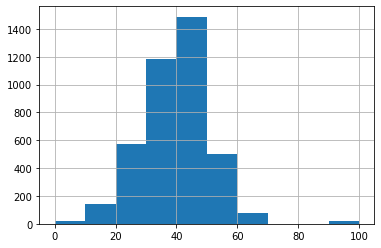

In [29]:
elvis.ratio.hist()

In [30]:
elvis[elvis.ratio > 80].head(50)

,artist,song,year,lyric,ratio
347672,Elvis Presley,(let me be your) teddy bear,1957.0,None,100
347747,Elvis Presley,(let me be your) teddy bear,2018.0,None,100
347960,Elvis Presley,teddy bear,2001.0,None,100
348297,Elvis Presley,medley: (let me be your) teddy bear/dont be cr...,2016.0,You know I can be found\nSitting home all alon...,100
348726,Elvis Presley,(let me be your) teddy bear,2012.0,None,100
348817,Elvis Presley,(let me be your) teddy bear,2012.0,None,100
349015,Elvis Presley,(let me be your)teddy bear,2012.0,None,100
349036,Elvis Presley,(let me be your) teddy bear,2012.0,None,100
349258,Elvis Presley,teddy bear (let me be your),1958.0,None,100
349271,Elvis Presley,(let me be your) teddy bear,1957.0,None,100


In [ ]:
# from fuzzywuzzy.process import dedupe
# test = dedupe(contains_dupes=elvis.song, scorer=fuzz.partial_ratio)

In [51]:
lyrics = data.loc[~data.lyric.isnull()]

In [52]:
len(lyrics)

186865

0

In [84]:
lyrics_subset = lyrics.sample(100000, replace=False)

In [85]:
import nltk

In [ ]:
tokens = lyrics_subset.lyric.apply(nltk.word_tokenize)
# lyrics_subset.head()

In [65]:
tokens

843394     [In, the, brightest, hour, of, my, darkest, da...
272728     [You, got, the, look, of, a, howlin, ', wolf, ...
676988     [You, 're, my, thrill, You, do, something, to,...
825436     [You, know, that, feeling, you, get, You, feel...
637924     [The, show, is, over, ,, you, got, to, go, hom...
                                 ...                        
1030989    [Ooh, yeah, ,, you, better, come, on, into, my...
177617     [I, can, barely, see, your, sneakers, You, say...
90586      [(, Run, ,, run, ,, run, ,, run, ,, run, ,, ru...
489994     [i, 'm, alone, again, and, i, 'm, thinking, ab...
1142894    [Anytime, at, all, ,, Anytime, at, all, ,, Any...
Name: lyric, Length: 10000, dtype: object

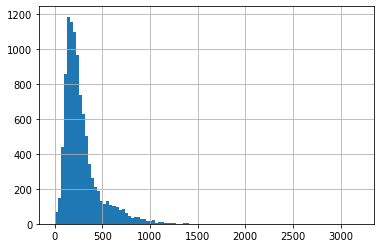

In [79]:
tokens.apply(len).hist(bins=100)

In [73]:
tokens.apply(len).min()

1

In [83]:
tokens[tokens.apply(len) < 5]

1098729           [[, Instrumental, ]]
377718            [[, Instrumental, ]]
435485            [[, instrumental, ]]
77586      [Boo-tay, Boo-tay, Boo-tay]
55662             [[, Instrumental, ]]
780847                    [You, weird]
874018            [(, Instrumental, )]
639084            [[, Instrumental, ]]
965458            [[, Instrumental, ]]
275797              [island, of, love]
1060682                   [(, Scat, )]
199962                      [lalalala]
1223691     [It, is, an, instrumental]
107502            [[, Instrumental, ]]
1204591           [[, Instrumental, ]]
486772            [[, Instrumental, ]]
17095             [[, Instrumental, ]]
192559            [[, Instrumental, ]]
55655             [[, Instrumental, ]]
Name: lyric, dtype: object